# Decision Tree CLassifier

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, export_graphviz,plot_tree
from sklearn.metrics import confusion_matrix

# import os
# from graphviz import Source
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc, roc_auc_score

# Importing the datasets

In [3]:
datasets = pd.read_csv('Social_Network_Ads.csv')

In [4]:
datasets

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Splitting the dataset into the Training set and Test set

In [5]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [6]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the classifier into the Training set

In [7]:
DecisionTreeClassifier?

In [8]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [9]:
cross_val_score(classifier,X_Train,Y_Train,cv=5)

array([0.83333333, 0.73333333, 0.85      , 0.86666667, 0.86666667])

In [10]:
classifier.fit(X_Train,Y_Train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting the test set results

In [11]:
Y_Pred = classifier.predict(X_Test)

# Making the Confusion Matrix 

The Predicted value match to True value
TP - 1 -> 1 -> 29
TN - 0 -> 0 -> 62

The Predicted value match to False value
FP - 1 -> 0 -> 6
FN - 0 -> 1 -> 3

# Precision = TP/(TP+FP) -> 

29/(29+6)

90  6
 0  4

4/(0+6)

# Recall = TP/(TP+FN)

29/(29+0)

# F1 Score

1/c = 1/2*(1/a + 1/b)

c = 2*a*b/(a+b)

F1_Score = 2*P*R/(P+R)

2*0.83*0.91/(0.83+0.91)

In [12]:
datasets['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
accuracy_score(Y_Test, Y_Pred)
# pd.DataFrame(confusion_matrix(Y_Test, Y_Pred))

0.91

In [14]:
classification_report(Y_Test, Y_Pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93        68\n           1       0.83      0.91      0.87        32\n\n    accuracy                           0.91       100\n   macro avg       0.89      0.91      0.90       100\nweighted avg       0.91      0.91      0.91       100\n'

In [15]:
precision_recall_fscore_support(Y_Test, Y_Pred)

(array([0.95384615, 0.82857143]),
 array([0.91176471, 0.90625   ]),
 array([0.93233083, 0.86567164]),
 array([68, 32], dtype=int64))

# Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


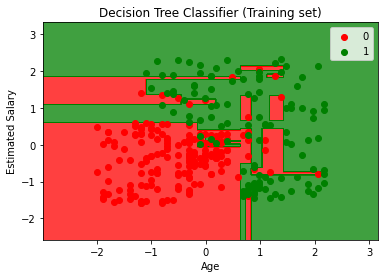

In [16]:
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


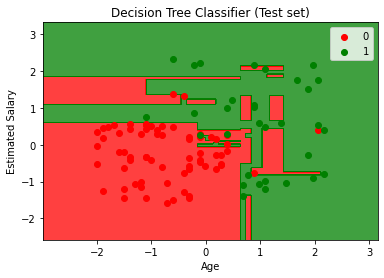

In [17]:
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

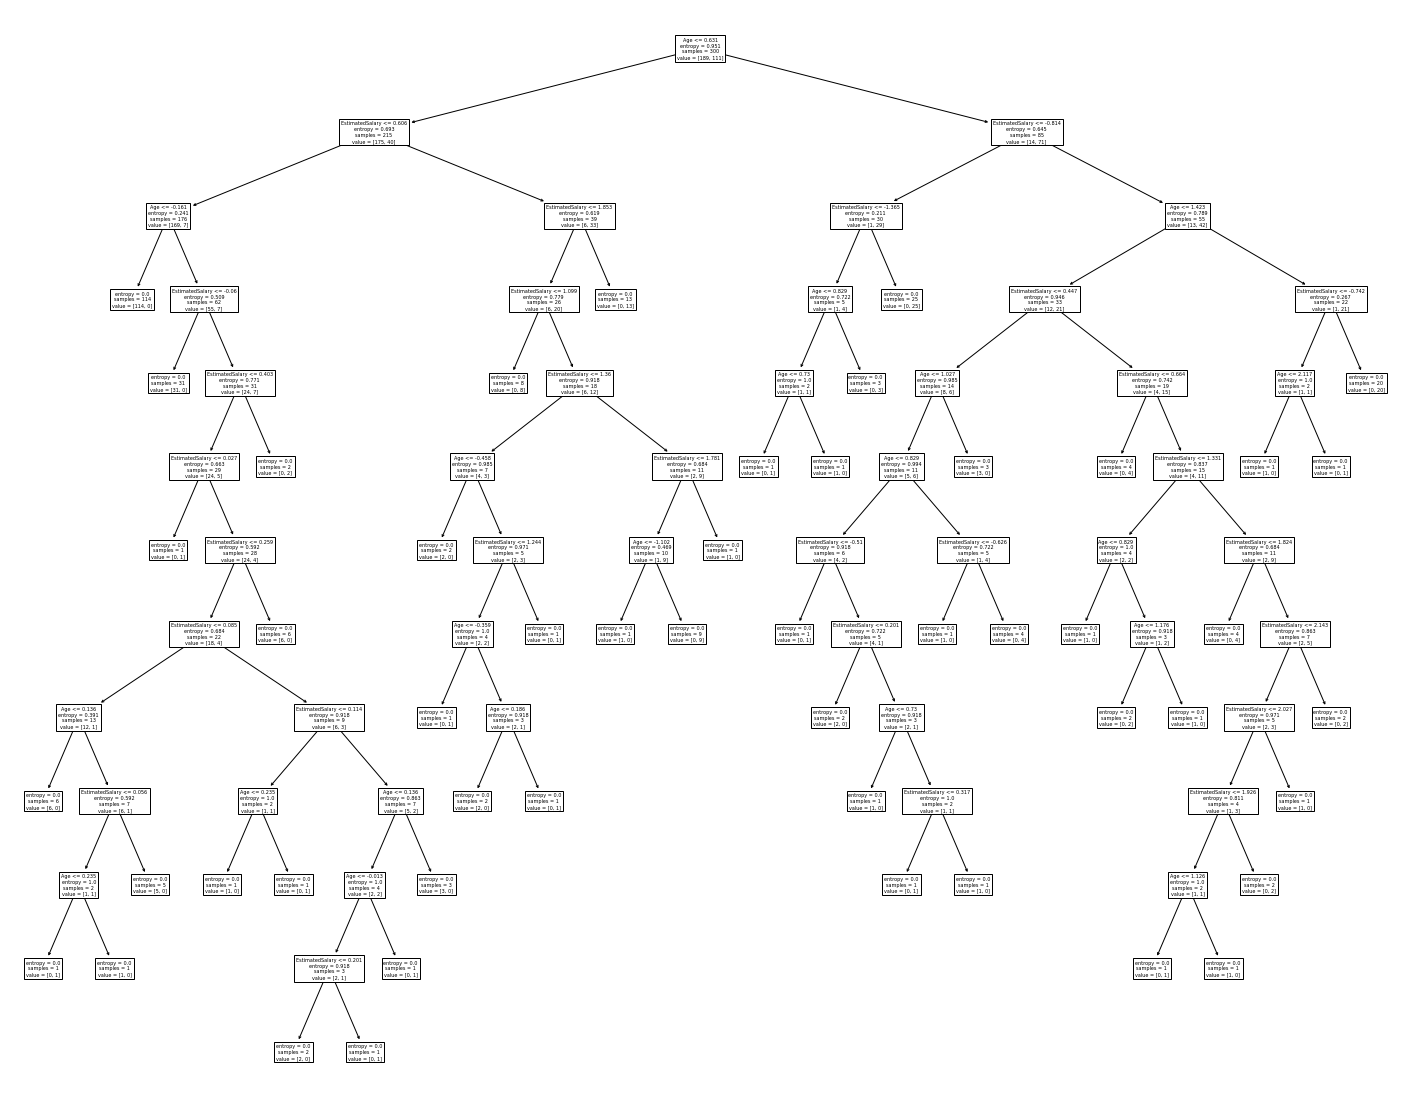

In [18]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(classifier,feature_names=datasets.columns[2:4])

In [19]:
export_graphviz(classifier)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 0.631\\nentropy = 0.951\\nsamples = 300\\nvalue = [189, 111]"] ;\n1 [label="X[1] <= 0.606\\nentropy = 0.693\\nsamples = 215\\nvalue = [175, 40]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= -0.161\\nentropy = 0.241\\nsamples = 176\\nvalue = [169, 7]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 114\\nvalue = [114, 0]"] ;\n2 -> 3 ;\n4 [label="X[1] <= -0.06\\nentropy = 0.509\\nsamples = 62\\nvalue = [55, 7]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 31\\nvalue = [31, 0]"] ;\n4 -> 5 ;\n6 [label="X[1] <= 0.403\\nentropy = 0.771\\nsamples = 31\\nvalue = [24, 7]"] ;\n4 -> 6 ;\n7 [label="X[1] <= 0.027\\nentropy = 0.663\\nsamples = 29\\nvalue = [24, 5]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n7 -> 8 ;\n9 [label="X[1] <= 0.259\\nentropy = 0.592\\nsamples = 28\\nvalue = [24, 4]"] ;\n7 -> 9 ;\n10 [label="X[1] <= 0.085\\nentropy = 0.684\\nsamples = 22\\nvalu